## Data 698 - Final Project
Baron Curtin

In [ ]:
# standard imports
import json
from pathlib import Path
from itertools import chain

# third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer

# additional setup
%matplotlib inline
plt.style.use('bmh')

In [ ]:
# constants
FINAL_DF = Path('./processed/final_df.ftr')

## Data Loading

In [ ]:
df = pd.read_feather(FINAL_DF)

## Exploratory Analysis

In [ ]:
i = 0
df.iloc[:, i:i+10].head(10)

,index,browserRequest.screenHeight,browserRequest.screenPixelDepth,browserRequest.screenWidth,campaignReferrer,deviceVentileGroup,pageId,pageInitializationId,productCategoryType,productPath
0,19431,960.0,0.0,1280.0,a88b7dcd1a9e3e17770bbaa6d7515b31a2d7e85d,10.0,flight.home,aa6621a4-2d8b-4c4e-be91-f0dbe23eb3d0,FLIGHTS,FLIGHTS
1,19432,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,2.0,flight.home,ec4281fa-dd7a-4d82-ab43-ff5bbcebe5d6,FLIGHTS,FLIGHTS
2,19433,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,0.0,flight.list,20397260-1a09-4e54-86a0-e37085858ad1,FLIGHTS,FLIGHTS
3,19434,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,14.0,flight.home,b5df6141-a133-49b2-8c55-ff4ed4fe3c58,FLIGHTS,FLIGHTS
4,19435,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,14.0,flight.home,b5df6141-a133-49b2-8c55-ff4ed4fe3c58,FLIGHTS,FLIGHTS
5,19436,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,0.0,flight.list,f6acbd41-21ad-4eac-b3c0-cba9fadbb87b,FLIGHTS,FLIGHTS
6,19437,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,0.0,flight.list,2f3ee138-a968-4ca0-9ee8-1dfd66a343d6,FLIGHTS,FLIGHTS
7,19438,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,14.0,flight.home,562ded75-98d1-4499-8b01-36cab349771f,FLIGHTS,FLIGHTS
8,19439,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,14.0,flight.home,562ded75-98d1-4499-8b01-36cab349771f,FLIGHTS,FLIGHTS
9,19440,912.0,24.0,1368.0,d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2,14.0,flight.home,562ded75-98d1-4499-8b01-36cab349771f,FLIGHTS,FLIGHTS


In [ ]:
# drop index
df = df.drop(columns='index')

In [ ]:
# datatype conversions
categorical_cols = ['deviceVentileGroup', 'returnIn15Days', 'returnIn30Days', 'returnIn45Days', 'returnIn60Days', 'converted']
df[categorical_cols] = df[categorical_cols].astype('category')

In [ ]:
rows, cols = df.shape
print(f'Row Count: {rows:,} | Column Count: {cols:,}')

Row Count: 2,522,669 | Column Count: 42


In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522669 entries, 0 to 2522668
Data columns (total 42 columns):
 #   Column                           Non-Null Count    Dtype              
---  ------                           --------------    -----              
 0   browserRequest.screenHeight      2518449 non-null  float64            
 1   browserRequest.screenPixelDepth  2518449 non-null  float64            
 2   browserRequest.screenWidth       2518449 non-null  float64            
 3   campaignReferrer                 2518449 non-null  object             
 4   deviceVentileGroup               2518449 non-null  category           
 5   pageId                           2518449 non-null  object             
 6   pageInitializationId             2522669 non-null  object             
 7   productCategoryType              2518449 non-null  object             
 8   productPath                      2518449 non-null  object             
 9   publisherUserId                  2522669 non-n

In [ ]:
df.isnull().sum()

browserRequest.screenHeight           4220
browserRequest.screenPixelDepth       4220
browserRequest.screenWidth            4220
campaignReferrer                      4220
deviceVentileGroup                    4220
pageId                                4220
pageInitializationId                     0
productCategoryType                   4220
productPath                           4220
publisherUserId                          0
request.requestedAt                   4220
segmentationType                      4220
request.nextRequestedAt             562623
request.lastRequestedAt             761658
request.timeDifference              761658
sessionId                             4220
sessionTime                           4220
nextSession                        1469732
daysToNextSession                  1469732
returnIn15Days                        4220
returnIn30Days                        4220
returnIn45Days                        4220
returnIn60Days                        4220
customDimen

In [ ]:
df['bigramLabel'] = (df['customDimensions.label'] + ' ' + df['nextLabel'].where(df['nextLabel'].notnull(), '')).str.strip()

### Numerical Column EDA

In [ ]:
df_num = df.select_dtypes(include=np.number)

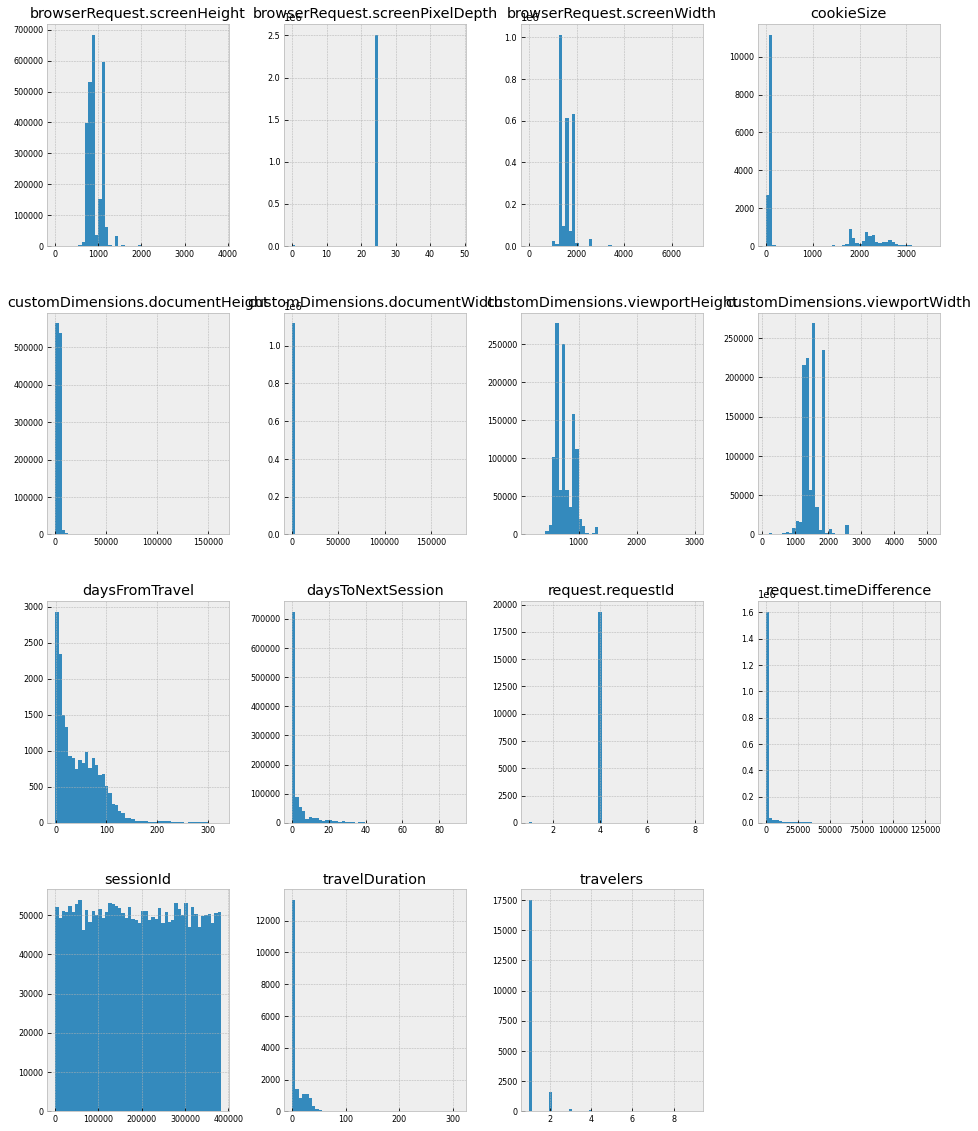

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.savefig('explore1.png')

### Categorical EDA

In [ ]:
df_cat = df.select_dtypes(include=['object','category'])
df_cat.columns.values

array(['campaignReferrer', 'deviceVentileGroup', 'pageId',
       'pageInitializationId', 'productCategoryType', 'productPath',
       'publisherUserId', 'segmentationType', 'returnIn15Days',
       'returnIn30Days', 'returnIn45Days', 'returnIn60Days',
       'customDimensions.label', 'tripType', 'destination', 'orderId',
       'converted', 'nextLabel', 'bigramLabel'], dtype=object)

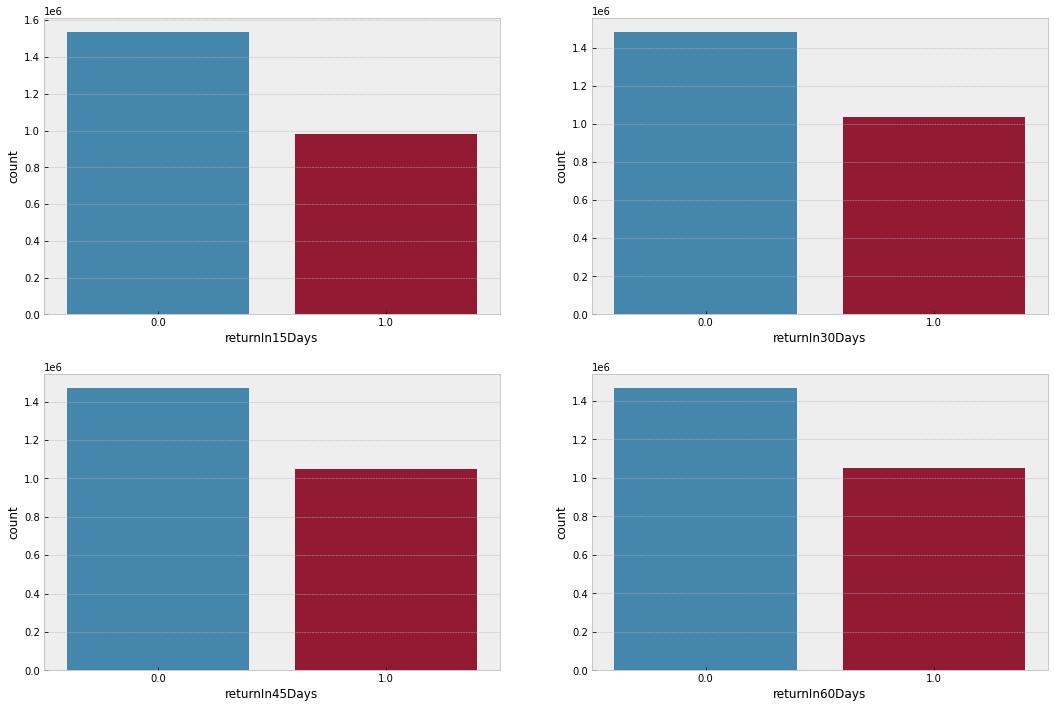

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
labels = ['returnIn15Days','returnIn30Days', 'returnIn45Days', 'returnIn60Days']

for label, ax in zip(labels, fig.axes):
    sns.countplot(x=label, data=df, ax=ax)
plt.savefig('explore2.png')

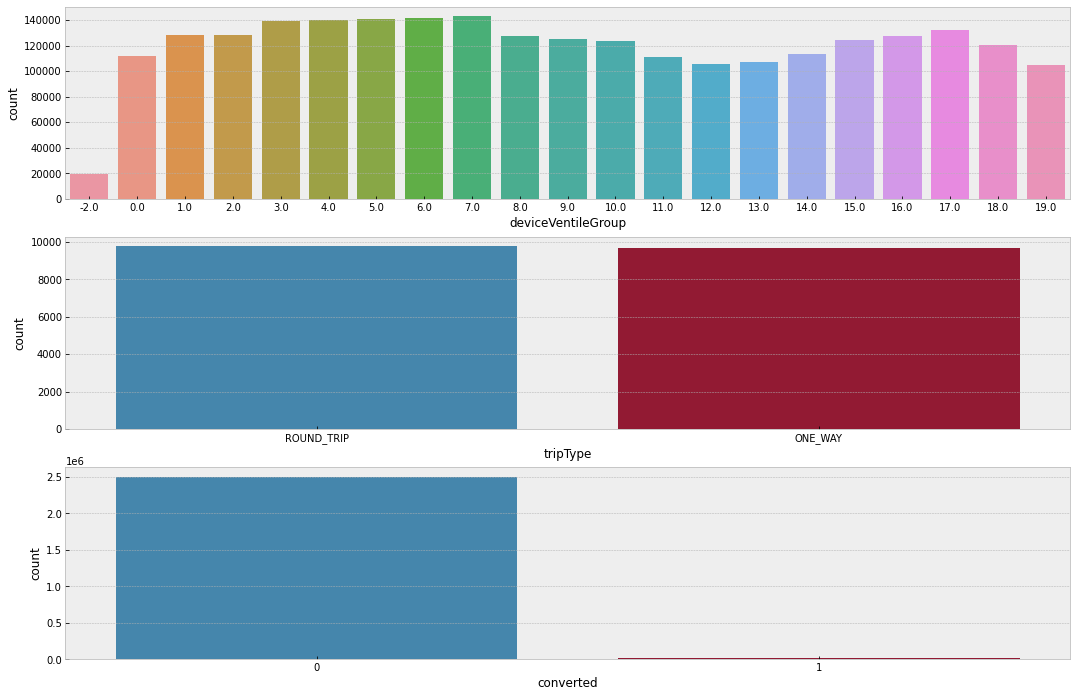

In [ ]:
from math import ceil

other_cat_cols = ['deviceVentileGroup',  'tripType', 'converted']

fig, ax = plt.subplots(len(other_cat_cols), 1, figsize=(18,12))

for col, ax in zip(other_cat_cols, fig.axes):
    sns.countplot(x=col, data=df_cat, ax=ax)
plt.savefig('explore3.png')

In [ ]:
df_cat['bigramLabel'].value_counts().sort_values(ascending=False)[:10]

SEARCH                              174417
DEPARTURE_DATE SEARCH                67196
FLIGHT_ORIGIN FLIGHT_DESTINATION     60036
SEARCH_TYPE_FLEXIBLE SEARCH          54031
RETURN_DATE SEARCH                   37128
NAV_BAR_LOG_IN                       29549
TRIP_TYPE TRIP_TYPE_ONE_WAY          27843
SEARCH SEARCH                        24544
FLIGHT_DESTINATION SEARCH            24307
SEARCH DEPARTURE_DATE                24032
Name: bigramLabel, dtype: int64

In [ ]:
df_cat['customDimensions.label'].value_counts().sort_values(ascending=False)[:10]

SEARCH                  278146
DEPARTURE_DATE          103155
FLIGHT_ORIGIN            79980
FLIGHT_DESTINATION       77418
NAV_BAR_LOG_IN           68229
SEARCH_TYPE_FLEXIBLE     68186
TRIP_TYPE                57935
RETURN_DATE              54123
FILTERS_STOPS            49452
TRIP_TYPE_ONE_WAY        28655
Name: customDimensions.label, dtype: int64

### Data Processing

In [ ]:
# drop conversion information
df = df.drop(columns=['tripType', 'travelDateStart', 'destination', 'travelers', 'travelDateEnd', 'orderId', 'conversionTime', 
                        'request.requestId', 'daysFromTravel', 'travelDuration'], errors='ignore')

# drop unncessary columns
df = df.drop(columns=['pageInitializationId', 'productCategoryType', 'segmentationType', 'customDimensions.label', 'nextLabel', 
                        'publisherUserId', 'request.requestedAt', 'request.nextRequestedAt', 'request.lastRequestedAt', 
                        'request.timeDifference', 'nextSession', 'daysToNextSession', 'sessionId', 'sessionTime', 'cookieSize',
                        'customDimensions.documentWidth', 'customDimensions.viewportHeight', 'customDimensions.viewportWidth',
                        'customDimensions.documentHeight'], errors='ignore')

In [ ]:
df.columns.values

array(['browserRequest.screenHeight', 'browserRequest.screenPixelDepth',
       'browserRequest.screenWidth', 'campaignReferrer',
       'deviceVentileGroup', 'pageId', 'productPath', 'returnIn15Days',
       'returnIn30Days', 'returnIn45Days', 'returnIn60Days', 'converted',
       'bigramLabel'], dtype=object)

In [ ]:
df = df[df['bigramLabel'].notna()]
df.isnull().sum()

browserRequest.screenHeight        4220
browserRequest.screenPixelDepth    4220
browserRequest.screenWidth         4220
campaignReferrer                   4220
deviceVentileGroup                 4220
pageId                             4220
productPath                        4220
returnIn15Days                     4220
returnIn30Days                     4220
returnIn45Days                     4220
returnIn60Days                     4220
converted                             0
bigramLabel                           0
dtype: int64

In [ ]:
df = df[(df['returnIn15Days'].notna()) | (df['returnIn30Days'].notna()) | (df['returnIn45Days'].notna()) | (df['returnIn60Days'].notna())]
df.isnull().sum()

browserRequest.screenHeight        0
browserRequest.screenPixelDepth    0
browserRequest.screenWidth         0
campaignReferrer                   0
deviceVentileGroup                 0
pageId                             0
productPath                        0
returnIn15Days                     0
returnIn30Days                     0
returnIn45Days                     0
returnIn60Days                     0
converted                          0
bigramLabel                        0
dtype: int64

In [ ]:
df.dtypes

browserRequest.screenHeight         float64
browserRequest.screenPixelDepth     float64
browserRequest.screenWidth          float64
campaignReferrer                     object
deviceVentileGroup                 category
pageId                               object
productPath                          object
returnIn15Days                     category
returnIn30Days                     category
returnIn45Days                     category
returnIn60Days                     category
converted                          category
bigramLabel                          object
dtype: object

In [ ]:
df['campaignReferrer'].value_counts()

d0941e68da8f38151ff86a61fc59f7c5cf9fcaa2    1068626
8779b41d1f29447861894bb7a86e07293430a947      18206
e3cca340ccf23adf00ab2f66fff5aaef42c04b0c       4283
75761cfc60cbb624cb7aab6c0308f4002f5eafea       4167
2d3986b9db1d4c522d1b39e74906feedc2c418df       3827
429642e73fc6a7e58244b570e2e4ba97f13811d9       3379
cbe648909034c0624c205fe219d3fbd10052c715       3248
a88b7dcd1a9e3e17770bbaa6d7515b31a2d7e85d       3070
82a36422d455213247e76b728a8ed41cf0074c73       2911
04a93eff3e3cc33297cd1b82a0693e065361f1ad       1993
239b4df0e5c39346a3084c020d582683c9233783        796
8237fe44341496c5c0cbe683a38950a85f687cbd        691
9809389f059a1be097af0e6c317b90ac1c1cba98         16
ccc9d04961e5acc3041df4c85091b0af91b6102c         14
2ada6586b7d4667d9f3701ea0313347f76511110          3
Name: campaignReferrer, dtype: int64

In [ ]:
df['bigramLabel'].value_counts()

SEARCH                                                     173384
DEPARTURE_DATE SEARCH                                       67196
FLIGHT_ORIGIN FLIGHT_DESTINATION                            60036
SEARCH_TYPE_FLEXIBLE SEARCH                                 54031
RETURN_DATE SEARCH                                          37128
                                                            ...  
PROMO_ROW_3 NAV_BAR_LOG_IN_SIGN_UP                              1
FILTERS_TRANSIT_VISAS STUDENT_UNIVERSE_INTERCARD_APP_AD         1
LISTING_18 FILTERS_DURATION                                     1
LISTING_4 FLIGHT_ORIGIN                                         1
SEARCH LISTING_13                                               1
Name: bigramLabel, Length: 3676, dtype: int64

In [ ]:
features = ['browserRequest.screenHeight', 'browserRequest.screenPixelDepth', 'browserRequest.screenWidth', 'campaignReferrer',
       'deviceVentileGroup', 'pageId', 'productPath', 'converted', 'bigramLabel']

labels = ['returnIn15Days', 'returnIn30Days', 'returnIn45Days', 'returnIn60Days']
X, y = df[features], df[labels]

In [ ]:
# data processing pipeline
cat_pipeline_cols = ['campaignReferrer', 'pageId', 'productPath', 'bigramLabel']
cat_pipeline = Pipeline([
   ('one_hot', OneHotEncoder())
])

num_pipeline_cols = ['browserRequest.screenHeight', 'browserRequest.screenPixelDepth', 'browserRequest.screenWidth']
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

pt_columns = ['converted']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_pipeline_cols),
    ('cat', cat_pipeline, cat_pipeline_cols),
    ('pass', 'passthrough', pt_columns)
])

X_prepared = full_pipeline.fit_transform(X)

## Model Creation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y['returnIn15Days'].to_numpy(), test_size=.2, random_state=7, stratify=y['returnIn15Days'].to_numpy())

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# clf = MultiOutputClassifier(LogisticRegressionCV(cv=5, random_state=7))
# clf = RandomForestClassifier(n_estimators=10)
clf = SGDClassifier(loss='log', penalty='elasticnet', random_state=7)
clf.fit(X_train, y_train)

cv_score = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc'))
cv_predictions = cross_val_predict(clf, X_train, y_train, cv=5)
predictions = clf.predict(X_test)
print(cv_score)

0.5827282166508191


In [ ]:
X_train.shape

(892184, 3698)

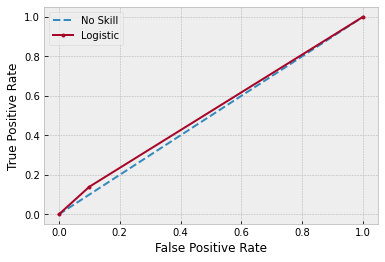

[[115215  12832]
 [ 81722  13277]] 

              precision    recall  f1-score   support

         0.0       0.59      0.90      0.71    128047
         1.0       0.51      0.14      0.22     94999

    accuracy                           0.58    223046
   macro avg       0.55      0.52      0.46    223046
weighted avg       0.55      0.58      0.50    223046
 

0.5197730814617628


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# roc curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr, tpr, _ = roc_curve(y_test, predictions)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('roc.png')
plt.show()


print(matrix, '\n')
print(report, '\n')
print(roc_auc)